# Исследование данных о российском кинопрокате



Заказчик исследования - **Министерство культуры Российской Федерации.**

Исходные данные взяты с портала открытых данных Министерства культуры, они содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования**

Проанализировать российский рынок проката фильмов, выявить текущие тренды, а также выяснить, насколько сильно интересны фильмы зрителям, получившие госужарственную поддержку.

**Ход работы**

1. Прочитать, объединить и посмотреть общую информацию о датафреймах
2. Предобработать типы данных, пропуски, дубликаты и др.
3. Провести исследовательский анализ
4. Написать общий вывод

### Шаг 1. Загружаем датафрейм

In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
# выгружаем датафреймы и выводим их

df1 = pd.read_csv('/datasets/mkrf_movies.csv')
df2 = pd.read_csv('/datasets/mkrf_shows.csv')
display(df1.head())
print(df2.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


    puNumber     box_office
0  111000113       2,450.00
1  111000115      61,040.00
2  111000116 153,030,013.40
3  111000117  12,260,956.00
4  111000118 163,684,057.79


In [ ]:
# смотрим общую информацию

print(df1.info())
print()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
# приводим общий столбец к одному типу данных для дальнейшего объединения

df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors='coerce')
df1.dropna(subset=['puNumber'], inplace=True)
df1['puNumber'] = df1['puNumber'].astype(int)

In [ ]:
# объединяем данные

data = df1.merge(df2, on='puNumber', how='outer')
display(data.head())
data.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**

Привели столбец к одинаковому типу для объединения. В данных присутствуют пропуски и некорректное значение времени. Также есть столбец с неправильным форматом написания. Оба датасета объединились без потерь данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Приведение названий колонок к общему виду

In [ ]:
# выводим название колонок

data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [ ]:
# приводим к общему виду

data = data.rename(
    columns={
        'puNumber': 'pu_number'
    }
)
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

#### Шаг 2.2. Проверка типов данных

In [ ]:
# изменяем типы данных в колонках

data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')
#data['show_start_date'] = pd.to_datetime(data['show_start_date'])

data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

#### Шаг 2.3. Изучение пропусков

In [ ]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [ ]:
# считаем количество пропусков по колонкам

data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

In [ ]:
# заменяем пропуски на 0

data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['financing_source'] = data['financing_source'].fillna(0)

In [ ]:
# удаляем пропущенные значения

data.dropna(subset=['film_studio', 'production_country', 'director'], inplace=True)

In [ ]:
# Комментарий ревьюера
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7485 7458 0.36


**Вывод**

В колонках с возвратными, невозвратными средствами, бюджетом и источником финансирования пропуски заменили на 0, потому что данные фильмы не были спонсированы государством либо данная информация отсутствует.

Пропуски в столбцах с киностудией, страной производителем и режиссёром удалили, поскольку они занимают менее 1% в общем количестве данных и могу помешать в дальнейшем анализе.

#### Шаг 2.4. Изучение дубликатов

In [ ]:
# считаем количество дубликатов

data.duplicated().sum()

0

In [ ]:
# ищем дубликаты в данном столбце, потому что в других они могут быть и это никак не связано с ошибками

data['pu_number'].duplicated().sum()

2

In [ ]:
# выводим дубликаты в датафрейме

data[data['pu_number'].duplicated() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,0,7.60,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,0,6.80,"комедия,криминал",NaN


In [ ]:
# ищем такие же значения

display(data.query('pu_number == 221154310'))
display(data.query('pu_number == 221054410'))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,0,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,0,7.60,"драма,мелодрама,история",NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,0,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,0,6.80,"комедия,криминал",NaN


In [ ]:
# смотрим значения столбца

data['pu_number'].describe()

count         7,458.00
mean    135,214,429.91
std      38,359,046.05
min       1,811,096.00
25%     113,000,117.25
50%     121,015,514.50
75%     124,003,288.75
max     231,001,111.00
Name: pu_number, dtype: float64

In [ ]:
# изменяем значения на те, которые будут меньше минимального или больше максимального из столбца

data.loc[((data['pu_number'] == 221154310) & (data['title'] == 'Как жениться и остаться холостым')),'pu_number'] = 1500000
data.loc[((data['pu_number'] == 221054410) & (data['title'] == 'Анализируй то!')),'pu_number'] = 1500001

data['pu_number'].duplicated().sum()

0

#### Шаг 2.5. Изучение категориальных значений

In [ ]:
# смотрим уникальные значения

data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [ ]:
# удаляем лишние пробелы

data['type'] = data['type'].str.strip()

In [ ]:
# приводим к одному формату

data['production_country'] = data['production_country'].str.replace(' ', '')
data['production_country'] = data['production_country'].str.replace('-', ',')
data['production_country'] = data['production_country'].str.replace(',', ', ')

# как можно было проще сделать?

In [ ]:
# приводим все данные к нижнему регистру

data = data.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,7.20,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,NaN,6.60,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,6.80,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,6.80,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,6.80,"фантастика,боевик,триллер",NaN


#### Шаг 2.6. Проверка количественных значений

In [ ]:
# смотрим информацию по количественным данным

data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,458.00","7,458.00","7,458.00","7,458.00","6,482.00","3,155.00"
mean,"135,155,538.96","528,157.68","2,180,435.55","5,663,752.47",6.48,"76,551,328.80"
std,"38,395,699.66","5,791,861.46","16,178,675.91","47,616,064.89",1.10,"240,455,853.44"
min,"1,500,000.00",0.00,0.00,0.00,1.00,0.00
25%,"113,000,113.00",0.00,0.00,0.00,5.90,"87,090.50"
50%,"121,015,512.50",0.00,0.00,0.00,6.60,"2,338,049.90"
75%,"124,003,217.75",0.00,0.00,0.00,7.20,"23,995,460.84"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.79"


In [ ]:
print(data[(data['refundable_support'] + data['nonrefundable_support']) > data['box_office']].shape[0])
print(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']].shape[0])

200
17


In [ ]:
# ищем аномалии

data[(data['nonrefundable_support'] != 0) & (data['budget'] == 0)]['pu_number'].count()

16

In [ ]:
# удаляем аномалии и проверяем результат

index = data[(data['nonrefundable_support'] != 0) & (data['budget'] == 0)].index
data.drop(index, inplace=True)

data[(data['nonrefundable_support'] != 0) & (data['budget'] == 0)]['pu_number'].count()

0

#### Шаг 2.7. Добавление новых столбцов





In [ ]:
# создаём столбец с годом выхода фильма

data['year_release'] = pd.DatetimeIndex(data['show_start_date']).year

In [ ]:
# создаём функции для извлечения 1 элемента из столбцов

def first_word(value):
    x = value['director'].split(',')
    return x[0]

data['first_director'] = data.apply(first_word, axis=1)

data['genres'] = data['genres'].astype(str)
def word_first(values):
    y = values['genres'].split(',')
    return y[0]

data['main_genre'] = data.apply(word_first, axis=1)

# не понимаю, почему в колонке с жанрами есть тип флоат
# как здесь можно было сделать легче?

In [ ]:
# Комментарий ревьюера
data.genres.unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'nan', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,м

In [ ]:
# считаем долю государственной поддержки от общего бюджета фильмов

data['share_in_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

# data.style.format({('share_in_budget') : '{:.2%}'})
# как в данном случае привести данные в проценты?

**Вывод**

- 1 столбец был приведён к общему виду
- Колонки со временем и рейтингом привели к верному типу
- Посчитали и заполнили пропуски. Пропуски в колонках с государственной поддержкой сигнализирует о том, что государство не спонсировало данные фильмы, поэтому их заменили на 0 либо забыли указать данную информацию. Где было маленькое количество пропусков (менее 1%), эти строки удалили.
- Явных дубликатов в датафрейме не было. Среди неявных было 2 дубликата, но они отличались по многим значениям из колонок, поэтому это скорее всего ошибка системы или человеческий фактор из-за которого у фильмов были одинаковые номера.
- Привели все уникальные названия в колонке типа фильма к правильному виду. А также все значения датафрейма к нижнему регистру.
- Проверили количественные значения. Удалил аномалии, в которых гос поддержка была больше нуля, а бюджет был нулевой. Причиной мог послужить сбой в системе или просто забыли указать информацию о бюджете.
- Добавили столбцы с годом выхода фильма, основным режиссёром, основным жанром и долю гос. поддержки от общего бюджета

### Шаг 3. Анализ данных

              quantity
year_release          
2010               980
2011               620
2012               592
2013               629
2014               804
2015               700
2016               814
2017               503
2018               875
2019               925


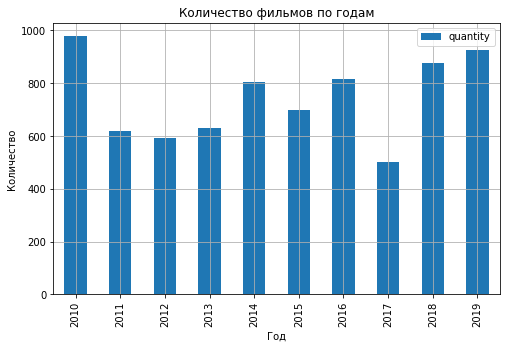

In [ ]:
# считаем общее количество фильмов за каждый год

#data.groupby('year_release')['title'].count()
number_of_films = data.pivot_table(index='year_release', values='title', aggfunc='count')
number_of_films.columns = ['quantity']
print(number_of_films)

number_of_films.plot(kind='bar',
                     xlabel='Год',
                     ylabel='Количество',
                     title='Количество фильмов по годам',
                     grid=True,
                     figsize=(8, 5))
plt.show()

**Вывод**

Больше всего фильмов вышло в 2010 году, самое маленькое число - в 2017. В остальные годы количество выпущенных фильмов постепенно возростало.

              quantity_in_cinema
year_release                    
2010                         105
2011                         109
2012                         127
2013                         184
2014                         278
2015                         460
2016                         522
2017                         355
2018                         470
2019                         529


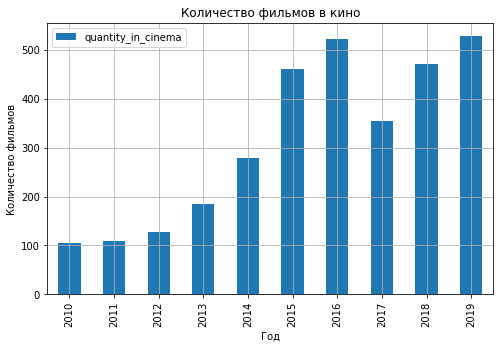

In [ ]:
# строим график по фильмам, вышедшим в кино

films_in_cinema = data.pivot_table(index='year_release', values='box_office', aggfunc='count')
films_in_cinema.columns = ['quantity_in_cinema']
print(films_in_cinema)

films_in_cinema.plot(kind='bar',
                     xlabel='Год',
                     ylabel='Количество фильмов',
                     title='Количество фильмов в кино',
                     grid=True,
                     figsize=(8, 5))
plt.show()

**Вывод**

Значительный рост показов фильмов в кинотеатрах наблюдается с 2015 года, затем идёт незначительный рост после просадки в 2017.

In [ ]:
# добавляем столбец

#number_of_films.join(films_in_cinema) - так можно было?
number_of_films['quantity_in_cinema'] = films_in_cinema['quantity_in_cinema']

In [ ]:
# добавляем столбец с долей фильмов в кино

number_of_films['share_in_cinema'] = number_of_films['quantity_in_cinema'] / number_of_films['quantity']
number_of_films.style.format({('share_in_cinema') : '{:.2%}'})

# можно было по-другому привести одну колонку в проценты?

,quantity,quantity_in_cinema,share_in_cinema
year_release,,,
2010,980,105,10.71%
2011,620,109,17.58%
2012,592,127,21.45%
2013,629,184,29.25%
2014,804,278,34.58%
2015,700,460,65.71%
2016,814,522,64.13%
2017,503,355,70.58%
2018,875,470,53.71%


                    box_office
year_release                  
2010              2,428,654.00
2011             14,102,765.00
2012              6,911,073.00
2013             29,799,706.20
2014          7,434,717,843.10
2015         38,595,246,173.89
2016         46,742,121,742.48
2017         48,458,147,253.75
2018         49,251,950,180.20
2019         48,278,101,953.08


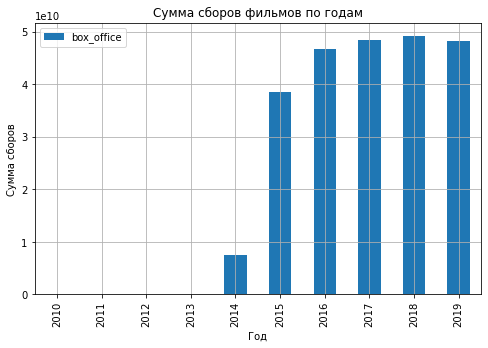

In [ ]:
# создаём сводную таблицу и строим график по динамике суммы сборов

cash_fees = data.pivot_table(index='year_release', values='box_office', aggfunc='sum')

#pd.options.display.float_format = '{:.2f}'.format - это округляет все датафреймы в ноутбуке?
# cash_fees['box_office'] = cash_fees['box_office'].apply(lambda x: float("{:.2f}".format(x))) - так можно округлить?

print(cash_fees)

cash_fees.plot(kind='bar',
               xlabel='Год',
               ylabel='Сумма сборов',
               title='Сумма сборов фильмов по годам',
               grid=True,
               figsize=(8, 5))
plt.show()

**Вывод**

Данный график подтверждает вывод предыдущего, что с началом 2015 года фильмов стало в разы больше, поэтому суммар сборов тоже увеличилась. Только 2017 год выделяется, в нём было почти на 200 фильмов меньше, чем в 16, но сборы превышают предыдущий год.

                       mean       median
year_release                            
2010              23,130.04     1,700.00
2011             129,383.17     3,000.00
2012              54,417.90     5,560.00
2013             161,954.92     3,522.50
2014          26,743,589.36    18,137.50
2015          83,902,709.07 4,796,668.30
2016          89,544,294.53 3,777,202.68
2017         136,501,823.25 9,919,415.00
2018         104,791,383.36 8,821,498.98
2019          91,262,952.65 4,601,033.60


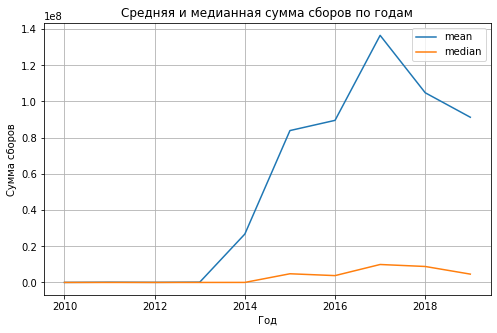

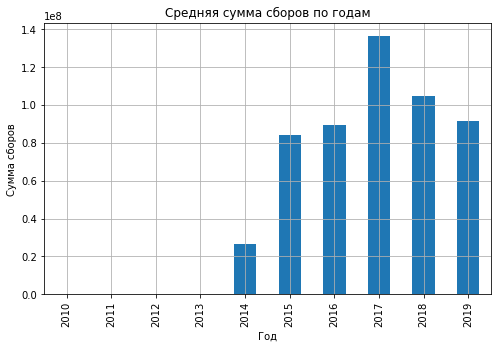

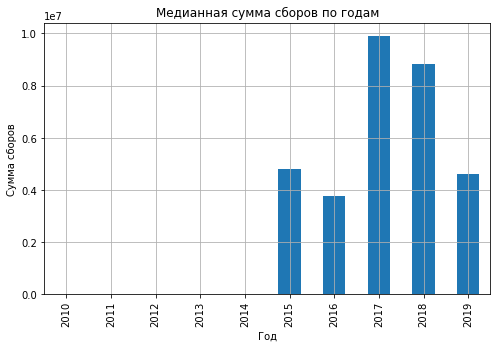

In [ ]:
# делаем сводную таблицу и графики для среднего и медианного значения сумм сборов по годам

cash_fees_mean = data.pivot_table(index='year_release', values='box_office', aggfunc=['mean', 'median'])
cash_fees_mean.columns=['mean', 'median']

#cash_fees_mean.style.format({['mean', 'median']: '{:.2f}'})
# как можно было округлить сводную таблицу сразу?

print(cash_fees_mean)

cash_fees_mean.plot(xlabel='Год',
                    ylabel='Сумма сборов',title='Средняя и медианная сумма сборов по годам',
                    grid=True,
                    figsize=(8, 5))
plt.show()

cash_fees_mean['mean'].plot(kind='bar',
                            xlabel='Год',
                            ylabel='Сумма сборов',
                            title='Средняя сумма сборов по годам',
                            grid=True,
                            figsize=(8, 5))
plt.show()

cash_fees_mean['median'].plot(kind='bar',
                              xlabel='Год',
                              ylabel='Сумма сборов',
                              title='Медианная сумма сборов по годам',
                              grid=True,
                              figsize=(8, 5))
plt.show()

**Вывод**

Минимальное среднее значения выпало на 2014 год, а медианное - на 2016. Максимальное значение в каждом показателе приходится на 2017 год. Показатели 2017 года возможно связаны с тем, что в этот год вышло меньше всего фильмов, из-за этого среднее и медианное значения так проявляются.

In [ ]:
# выводим уникальные значения

data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [ ]:
# делает отдельный столбец для каждого возраста

def column_age(age):
    if '«0+» - для любой зрительской аудитории' in age['age_restriction']:
        return '0+'
    elif '«6+» - для детей старше 6 лет' in age['age_restriction']:
        return '6+'
    elif '«12+» - для детей старше 12 лет' in age['age_restriction']:
        return '12+'
    elif '«16+» - для детей старше 16 лет' in age['age_restriction']:
        return '16+'
    elif '«18+» - запрещено для детей' in age['age_restriction']:
        return '18+'

data['age'] = data.apply(column_age, axis=1)

age                      0+               12+               16+  \
year_release                                                      
2010           1,887,611.00        120,146.00        366,512.00   
2011          13,499,871.00        219,891.00        381,513.00   
2012           2,222,133.00        108,734.00      3,254,216.00   
2013           2,710,302.50     20,910,336.50        658,069.60   
2014         375,562,258.20  2,584,782,324.00    534,046,070.60   
2015         379,054,578.37 13,419,509,570.51 10,849,019,576.07   
2016         150,034,321.67 11,150,762,103.96 16,594,249,489.74   
2017         229,598,930.00  7,851,427,660.67 18,694,590,951.06   
2018          32,449,002.11 14,267,250,435.69 16,278,405,946.93   
2019          17,746,066.82 12,680,198,773.67 12,753,418,984.60   

age                        18+                6+  
year_release                                      
2010                 54,385.00               NaN  
2011                  1,040.00            

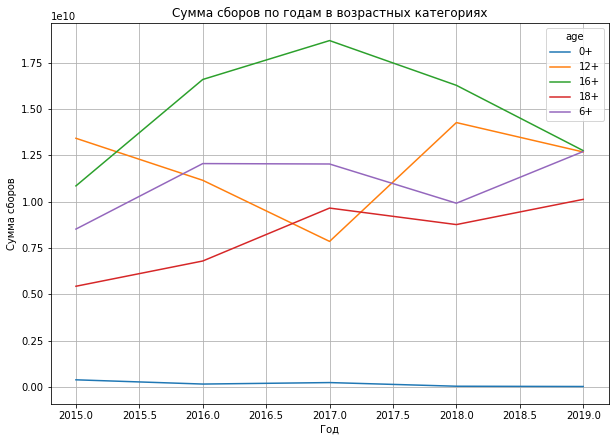

In [ ]:
# строим график по каждому году, группе и сумме сборов

age_group = data.pivot_table(index='year_release', columns='age', values='box_office', aggfunc='sum')
print(age_group)

age_group.query('year_release > 2014').plot(xlabel='Год',
                                            ylabel='Сумма сборов',
                                            title='Сумма сборов по годам в возрастных категориях',
                                            grid=True,
                                            figsize=(10, 7))
plt.show()

**Вывод**

Возрастная категория влияет на количество сборов, больше всего собрали в бюджет фильмы с ограничением в 16+ лет. Меньше всего сборов у категории 0+, предполагаю, что это связано с маленьким количеством выпускаемых фильмов в данном возрастном ограничении.

Большие скачки по сборов у групп фильмов с 16+ и 12+ лет, пик 16+ приходится на минимальное значение 12+, скорее всего в 2017 году вышло гораздо больше фильмов для лиц старше 16 лет либо это были какие-то бестселлеры.

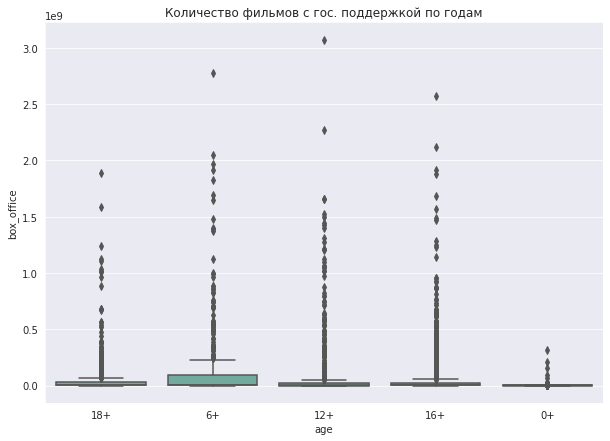

In [ ]:
#

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.boxplot(data=data,
            x='age',
            y='box_office',
            color='#69b3a2')
plt.title('Количество фильмов с гос. поддержкой по годам')
plt.show()

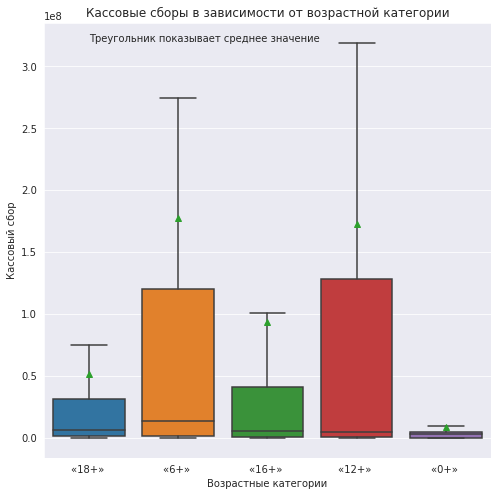

In [ ]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = (temp['year_release'] >= 2015) & (temp['year_release'] <= 2019)

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

In [ ]:
# выводим уникальные значения

data['financing_source'].unique()

array([nan, 'министерство культуры', 'фонд кино',
       'министерство культуры, фонд кино'], dtype=object)

In [ ]:
# считаем количество спонсируемых государством фильмов

print(f'Всего фильмов, которые получили гос. поддержку: {data.query("financing_source != 0").shape[0]}')

Всего фильмов, которые получили гос. поддержку: 7442


   year_release              sum  count
0          2013   134,347,945.00      2
1          2014   549,002,299.00     15
2          2015 3,247,241,459.00     81
3          2016 3,977,155,482.00     58
4          2017 3,098,971,662.00     39
5          2018 3,098,000,000.00     52
6          2019 4,724,000,000.00     69


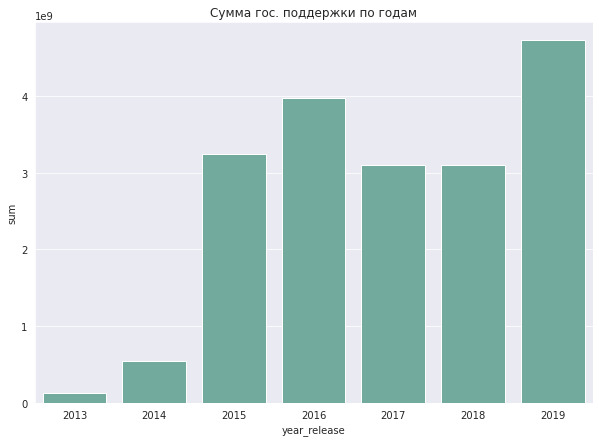

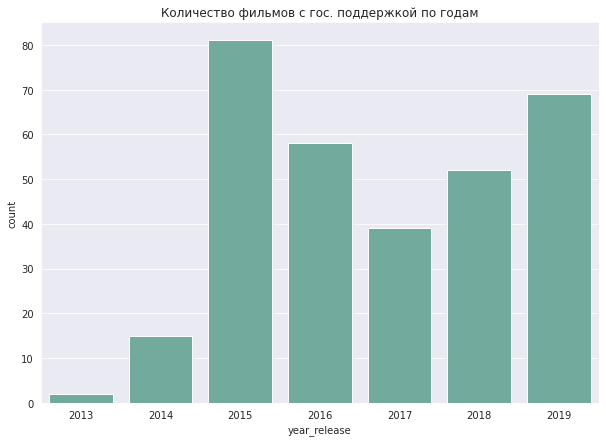

In [ ]:
# считаем сумму, выделенную для спонсорства и количество спонсируемых фильмов по годам

data['support'] = data['refundable_support'] + data['nonrefundable_support']
data['support'].replace(0, np.nan, inplace=True)

support_pivot = data.pivot_table(index='year_release', values='support', aggfunc=['sum', 'count'])
support_pivot = support_pivot.query('year_release > 2012')
support_pivot.reset_index(inplace=True)
support_pivot.columns = ['year_release', 'sum', 'count']

print(support_pivot)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.barplot(data=support_pivot,
            x='year_release',
            y='sum',
            color='#69b3a2')\
            .set_title('Сумма гос. поддержки по годам')
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.barplot(data=support_pivot,
            x='year_release',
            y='count',
            color='#69b3a2')
plt.title('Количество фильмов с гос. поддержкой по годам')
plt.show()

**Вывод**

Самую большую сумму за год государство выделело в 2019 году, а максимальное количество спонсируемых фильмов было в 2015 году. Самый низкий показатель для обоих графиков является 2013 год, т.к. в данный год является первым, когда фильмы получали поддержку от государства.

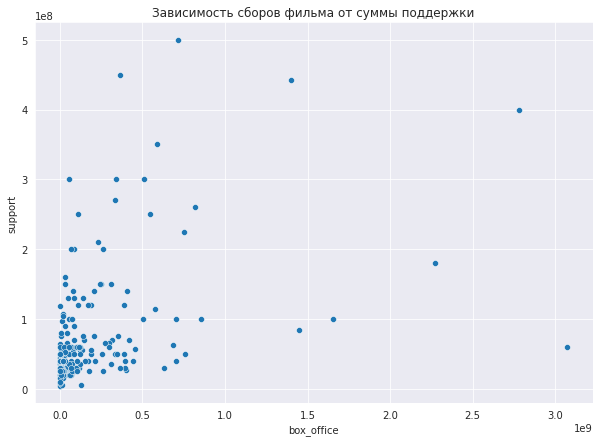

0.48193765052021015

In [ ]:
# считаем зависимость сборов фильма от гос. поддержки

plt.figure(figsize=(10, 7))
sns.scatterplot(data=data.query('year_release > 2012'),
                x='box_office',
                y='support')
plt.title('Зависимость сборов фильма от суммы поддержки')
plt.show()

data['box_office'].corr(data['support'])

**Вывод**

Корреляция между сборами фильма и поддержкой проявляется средняя, почти 0.5. Данный показатель является одним из важнейших для дальнейшего принятия решений о бюджетировании фильмов.

   year_release              sum  count           revenue
0          2013   134,347,945.00      2   -104,548,238.80
1          2014   549,002,299.00     15  6,885,715,544.10
2          2015 3,247,241,459.00     81 35,348,004,714.89
3          2016 3,977,155,482.00     58 42,764,966,260.48
4          2017 3,098,971,662.00     39 45,359,175,591.75
5          2018 3,098,000,000.00     52 46,153,950,180.20
6          2019 4,724,000,000.00     69 43,554,101,953.08


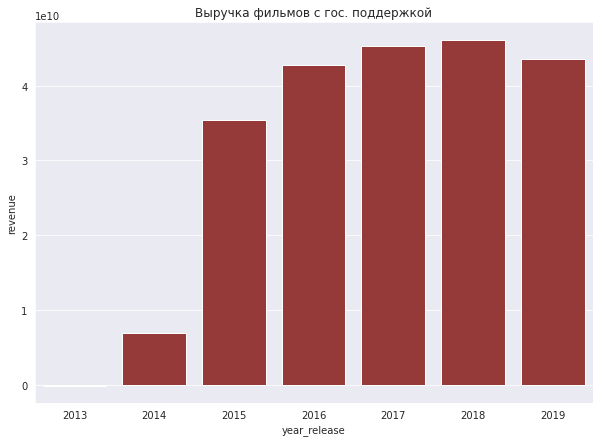

In [ ]:
# считаем окупаемость спонсируемых кино

box_year = (data.query('year_release > 2012 & financing_source != 0'))
box_year = box_year.pivot_table(index='year_release', values='box_office', aggfunc='sum')
box_year.reset_index(inplace=True)

support_pivot['revenue'] = box_year['box_office'] - support_pivot['sum']

print(support_pivot)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.barplot(data=support_pivot,
            x='year_release',
            y='revenue',
            color='brown')
plt.title('Выручка фильмов с гос. поддержкой')
plt.show()

**Вывод**

Прибыльнее всего оказались фильмы, вышедшие в 2017 году. Единственный год, когда фильмы не окупились - 2013

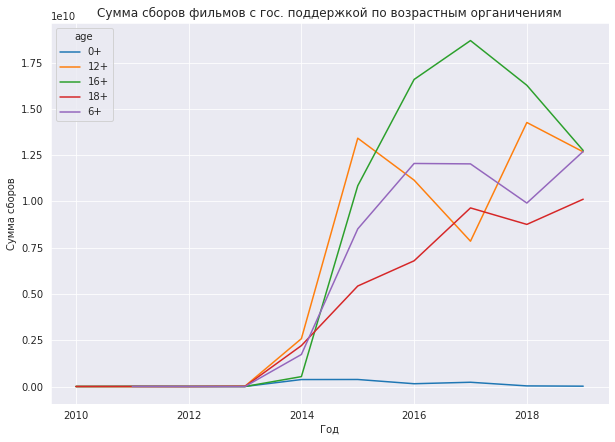

In [ ]:
# считаем сумму сборов бюджетированных фильмов

data.query('financing_source != 0').pivot_table(index='year_release', columns='age', values='box_office', aggfunc='sum')\
    .plot(xlabel='Год',
          ylabel='Сумма сборов',
          title='Сумма сборов фильмов с гос. поддержкой по возрастным органичениям',
          grid=True,
          figsize=(10, 7))
plt.show()

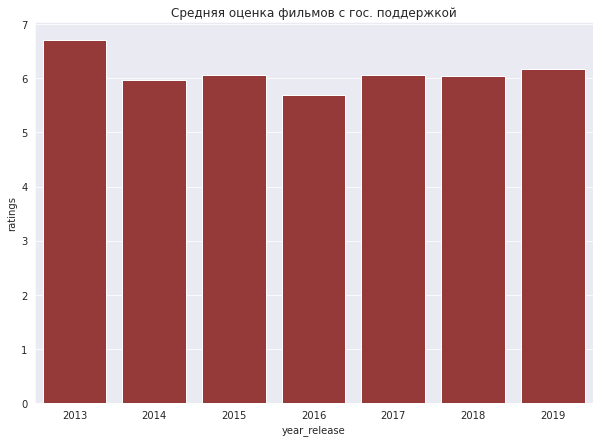

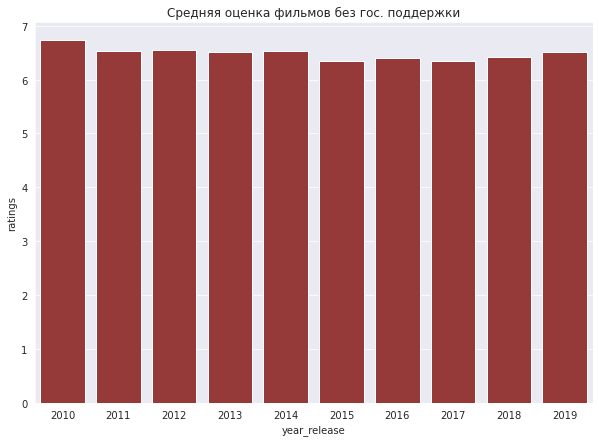

In [ ]:
# сравниваем среднюю оценку
data['financing_source'] = data['financing_source'].fillna(0)

rating_support = data.query('financing_source != 0').pivot_table(index='year_release', values='ratings', aggfunc='mean')
rating_support.reset_index(inplace=True)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.barplot(data=rating_support,
            x='year_release',
            y='ratings',
            color='brown')
plt.title('Средняя оценка фильмов с гос. поддержкой')
plt.show()

no_financing = data.query('financing_source == 0').pivot_table(index='year_release', values='ratings', aggfunc='mean')
no_financing.reset_index(inplace=True)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.barplot(data=no_financing,
            x='year_release',
            y='ratings',
            color='brown')
plt.title('Средняя оценка фильмов без гос. поддержки')
plt.show()

**Вывод**

Средняя оценка фильмов с бюджетированием составляет примерно 6, что в свою очередь примерно на 0.3-0.5 баллов меньше, чем средняя оценка фильмов без поддержки государства.

### Шаг 5. Общий вывод

**Общий вывод**

Была поставлена задача об изучении рынка российского кинопроката и выявить тенденции. В основе анализа лежали данные с портала открытых данных Министерства культуры.

По ходу работы над проектом были выполнены следующие этапы:
1. Открытие и изучение датасета
2. Предобработка данных
- Удаление пропусков
- Изменение типов данных
- Приведение в общему типу
- Поиск дубликатов
- Анализ количественных и категориальных данных
- Добавление новых столбцов
3. Исследовательский анализ
- Посчитали количество фильмов
- Нашли сумму сборов по годам
- и т.д.
4. Исследование фильмов с гос. поддержкой

**Количество фильмов в прокате**

Больше всего фильмов показали в 2019 году. Меньше всего в 2010. Наблюдается растущая тенденция, в 2017 году произошёл спад неизвестно по какой причине.

**Сумма сборов**

После 2014 года идёт резкий скачок, после чего происходит незначительный рост, где пиком является 2018.

**Возрастные ограничения**

Лидерами по сборам с 2016 по 2018 являются фильмы с ограничением 16+. Пик приходится на 2017.

**Сумма государственной поддержки и количество фильмов**

Данный показатель имеет свой максимум в 2019 году и минимум в 2013 году, поскольку с него и началась программа поддержки кино, скорее всего. Больше всего спонсируемых фильмов было в 2015.

**Корреляция сборов фильма и суммы спонсирования**

Этот коэффициент составляет почти 0.5, что свидетельствует о средней зависимости: чем больше выделенных денег от государства на фильм, тем больше сумма сборов.

**Выручка кино с бюджетированием**

Самая большая выручка в 2017 году, одно из причин это то, что в данный год было выделено меньше всего в период с 2015 по 2019 годы.

**Сумма спонсируемых фильмов по возрастным ограничениям**

В данной ситуации лидером является 12+ в 2018 году, затем идёт 16+, а меньше всего у ограничений 0+ и 18+. Возможно это связано с тем, что государству не выгодно поддерживать в экономическом и культурном планах картиных 18+ и 0+.

**Средняя оценка**

Средняя оценка у спонсируемых фильмов почти ничем не отличается за 7 лет, в среднем люди ставят оценку - 6.

Государству выгодно поддерживать фильмы в категориях 6+ и 12+, потому что в них часто бывают мультфильмы, на которые детям в большинстве случаев одним ходить не разрешают, поэтому идёт 2-я или 3-я выручка в этой ситуации.